<a href="https://colab.research.google.com/github/JANG-hyeonjun/biomedical_deeplearning/blob/main/lab02_201602955_%EC%9E%A5%ED%98%84%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.2linear-regression-scratch

## 3.2.1generating the Dataset

In [1]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.2

     |███████████████████████████████▌| 834.1MB 1.4MB/s eta 0:00:09tcmalloc: large alloc 1147494400 bytes == 0x55f5448e2000 @  0x7f0f82582615 0x55f50be5906c 0x55f50bf38eba 0x55f50be5be8d 0x55f50bf4d99d 0x55f50becffe9 0x55f50becab0e 0x55f50be5d77a 0x55f50becfe50 0x55f50becab0e 0x55f50be5d77a 0x55f50becc86a 0x55f50bf4e7c6 0x55f50becbee2 0x55f50bf4e7c6 0x55f50becbee2 0x55f50bf4e7c6 0x55f50becbee2 0x55f50bf4e7c6 0x55f50becbee2 0x55f50be5d69a 0x55f50becbc9e 0x55f50becae0d 0x55f50be5d77a 0x55f50becba45 0x55f50be5d69a 0x55f50becba45 0x55f50becab0e 0x55f50be5d77a 0x55f50becc86a 0x55f50becab0e
     |████████████████████████████████| 846.0MB 20kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 81kB 4.8MB/s 


In [2]:
%matplotlib inline 
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    print(w.shape)
    print(X.shape)
    y = torch.matmul(X,w) + b
    print(len(y))
    y += torch.normal(0,0.01,y.shape)
    print('\n')
    print(len(y))
    return X,y.reshape((-1,1))


In [4]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

torch.Size([2])
torch.Size([1000, 2])
1000


1000


In [5]:
print(features.shape)
print(labels.shape)
print(len(features))

torch.Size([1000, 2])
torch.Size([1000, 1])
1000


In [6]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-0.0823, -1.2213]) 
label: tensor([8.1761])


In [7]:
print(features[:,(1)])

tensor([-1.2213e+00, -1.1007e+00, -1.7120e+00, -5.2217e-01,  1.0742e+00,
        -2.0017e-02,  1.9477e-01,  1.1415e-01, -5.0498e-01, -2.4672e+00,
         1.0234e+00, -1.2972e+00, -4.1627e-01,  4.9755e-01, -1.2386e+00,
         3.8147e-01,  3.9192e-01,  5.1099e-01, -2.0806e-01, -6.1080e-01,
        -1.6414e+00,  1.6598e+00,  3.7338e-01, -1.2753e-01,  7.4537e-01,
         1.7716e+00,  7.5860e-01, -4.4359e-01, -1.9089e+00,  2.9271e-01,
        -8.9850e-01, -5.5518e-01,  8.8637e-01,  9.1286e-01, -5.8104e-01,
        -9.6961e-01, -9.5112e-01, -1.1398e+00, -1.5265e+00,  6.8917e-01,
         7.1402e-02, -4.7771e-01, -9.5815e-01,  3.2654e+00, -7.7960e-01,
        -1.3244e-01,  4.5263e-01, -7.4915e-01, -1.5937e+00,  7.7936e-01,
         3.8905e-01, -6.7757e-01,  4.0233e-01,  8.7253e-01, -4.3967e-01,
         5.2130e-01,  8.2916e-02,  1.6627e-01,  7.9269e-01,  5.8495e-01,
         3.1077e-02,  1.0900e+00, -4.0371e-01, -1.5767e+00, -3.7304e-01,
        -4.4310e-01, -1.9707e-01, -2.4660e-01,  1.0

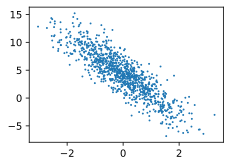

In [8]:
d2l.set_figsize()

d2l.plt.scatter(features[:,(1)].detach().numpy(),
                labels.detach().numpy(),1);

## 3.2 Reading the Dataset

In [9]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #print(indices)
    random.shuffle(indices)
    #print(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        #print(len(batch_indices))
        yield features[batch_indices],labels[batch_indices]

In [10]:
batch_size = 10

for X,y in data_iter(batch_size, features,labels):
    print(X,'\n',y)
    break

tensor([[-1.5651, -0.6909],
        [ 0.7165, -1.2386],
        [ 0.1617, -0.5920],
        [ 0.5749, -0.2444],
        [ 1.9131,  0.2043],
        [-0.5645, -0.4085],
        [ 0.4475,  0.8052],
        [ 0.1087, -0.8985],
        [-0.5210, -0.2466],
        [ 0.6529,  1.4324]]) 
 tensor([[3.4207],
        [9.8627],
        [6.5322],
        [6.1712],
        [7.3185],
        [4.4630],
        [2.3661],
        [7.4677],
        [4.0111],
        [0.6389]])


## 3.2.3 initializing Model Parameters

In [11]:
w = torch.normal(0,0.01,size=(2,1), requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [12]:
print(w,b)

tensor([[-0.0104],
        [ 0.0071]], requires_grad=True) tensor([0.], requires_grad=True)


## 3.2.4 Defining the Model

In [13]:
print(X.shape)
print(w.shape)
print(y.shape)

torch.Size([10, 2])
torch.Size([2, 1])
torch.Size([10, 1])


In [14]:
def lineareg(X,w,b):
    return torch.matmul(X,w) + b

## 3.2.5 Defining the Loss Function

In [15]:
def squared_loss(y_hat,y):
    #print(y_hat.shape)
    #print(y.shape)
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 3.2.6 Defining the Optimization Algorithm

In [16]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 3.2.7 Training

In [17]:
lr = 0.03
num_epochs = 3
net = lineareg
loss = squared_loss

In [18]:
print(features.shape)

torch.Size([1000, 2])


In [19]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss{float(train_l.mean()):f}') 


epoch1,loss0.032478
epoch2,loss0.000115
epoch3,loss0.000050


In [20]:
print(f'error in estimating w: {true_w-w.reshape(true_w.shape)}')
print(f'error in estimating b:{true_b - b}')

error in estimating w: tensor([ 0.0003, -0.0004], grad_fn=<SubBackward0>)
error in estimating b:tensor([0.0004], grad_fn=<RsubBackward1>)


# 3.3Concise Implementation of Linear Regression

## 3.3.1 Generating the Dataset

In [21]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)

## 3.3.2 Reading the Dataset

In [27]:
def load_array(data_arrays,batch_size,is_train = True): #@save
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features,labels),batch_size)

In [28]:
next(iter(data_iter))

[tensor([[ 0.1954, -0.1714],
         [ 0.3873, -1.2045],
         [-1.9392, -2.1340],
         [ 0.5369,  1.2926],
         [-0.7303, -1.4801],
         [-0.1937,  1.1726],
         [-0.7767,  0.0222],
         [-0.1453, -1.2687],
         [ 0.8117,  1.8058],
         [ 0.4632, -0.6504]]), tensor([[ 5.1916],
         [ 9.0667],
         [ 7.5882],
         [ 0.8627],
         [ 7.7561],
         [-0.1806],
         [ 2.5665],
         [ 8.2228],
         [-0.3329],
         [ 7.3535]])]

##3.3.3 Defining the Model

In [56]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [66]:
print(net[0].weight.data)
print(net[0].bias.data)

tensor([[ 1.9990, -3.4010]])
tensor([4.2003])


## 3.3.4 Initializing Model Parameters

In [58]:
print(net[0].weight.data.normal_(0,0.01))
net[0].bias.data.fill_(0)

tensor([[-0.0025, -0.0181]])


tensor([0.])

## 3.3.5 Defining the Loss Function

In [59]:
loss = nn.MSELoss()

## 3.3.6 Defining the Optimization Alogrithm

In [60]:
print(net.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)>


In [61]:
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

## 3.3.7  Training

In [63]:
num_epochs = 7
for epoch in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features),labels)
    print(f'epoch{epoch + 1},loss{l:f}')

epoch1,loss0.000100
epoch2,loss0.000100
epoch3,loss0.000100
epoch4,loss0.000100
epoch5,loss0.000100
epoch6,loss0.000100
epoch7,loss0.000101


In [67]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:',true_b-b)

error in estimating w: tensor([0.0010, 0.0010])
error in estimating b: tensor([-0.0003])


In [ ]:
b